<a href="https://colab.research.google.com/github/Pmilivojevic/Perspective-translation/blob/master/perspectiveTranslation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [ ]:
imgPersp= cv2.cvtColor(cv2.imread('/content/drive/My Drive/Colab Notebooks/s4.jpg'), cv2.COLOR_BGR2GRAY)
imgDest= cv2.cvtColor(cv2.imread('/content/drive/My Drive/Colab Notebooks/s5.jpg'), cv2.COLOR_BGR2GRAY)

In [ ]:
orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(imgPersp, None)
keypoints2, descriptors2 = orb.detectAndCompute(imgDest, None)

In [ ]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

In [ ]:
matches.sort(key=lambda x: x.distance, reverse=False)
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]
imMatches = cv2.drawMatches(imgPersp, keypoints1, imgDest, keypoints2, matches, None)

In [ ]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt

cv2.drawChessboardCorners(imgPersp, (3, 3), points1, True)
cv2.drawChessboardCorners(imgDest, (3, 3), points2, True)

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
imgTrans= cv2.warpPerspective(imgPersp, h, (imgDest.shape[1], imgDest.shape[0]))

In [ ]:
ret1, cornersPersp = cv2.findChessboardCorners(imgPersp, (3, 3), None)
if ret1:
    cv2.drawChessboardCorners(imgPersp, (3, 3), cornersPersp, ret1)
ret2, cornersDist = cv2.findChessboardCorners(imgDest, (3, 3), None)
if ret2:
    cv2.drawChessboardCorners(imgDest, (3, 3), cornersDist, ret2)

In [ ]:
ptsPersp= np.array([[cornersPersp[6][0][0], cornersPersp[6][0][1]], [cornersPersp[3][0][0], cornersPersp[3][0][1]], [cornersPersp[0][0][0], cornersPersp[0][0][1]],
                    [cornersPersp[7][0][0], cornersPersp[7][0][1]], [cornersPersp[4][0][0], cornersPersp[4][0][1]], [cornersPersp[1][0][0], cornersPersp[1][0][1]],
                    [cornersPersp[8][0][0], cornersPersp[8][0][1]], [cornersPersp[5][0][0], cornersPersp[5][0][1]], [cornersPersp[2][0][0], cornersPersp[2][0][1]]])

ptsDest= np.array([[cornersDist[0][0][0], cornersDist[0][0][1]], [cornersDist[1][0][0], cornersDist[1][0][1]], [cornersDist[2][0][0], cornersDist[2][0][1]],
                   [cornersDist[3][0][0], cornersDist[3][0][1]], [cornersDist[4][0][0], cornersDist[4][0][1]], [cornersDist[5][0][0], cornersDist[5][0][1]], 
                   [cornersDist[6][0][0], cornersDist[6][0][1]], [cornersDist[7][0][0], cornersDist[7][0][1]], [cornersDist[8][0][0], cornersDist[8][0][1]]])

h, status = cv2.findHomography(ptsPersp, ptsDest)
imgTrans= cv2.warpPerspective(imgPersp, h, (imgDest.shape[1], imgDest.shape[0]))

TypeError: ignored

In [ ]:
print(h)

[[1.14461473e+00 2.54446646e-04 1.01173461e-02]
 [7.21420714e-02 1.00051436e+00 7.22811135e-03]
 [2.82604671e-04 2.06788161e-06 1.00000000e+00]]


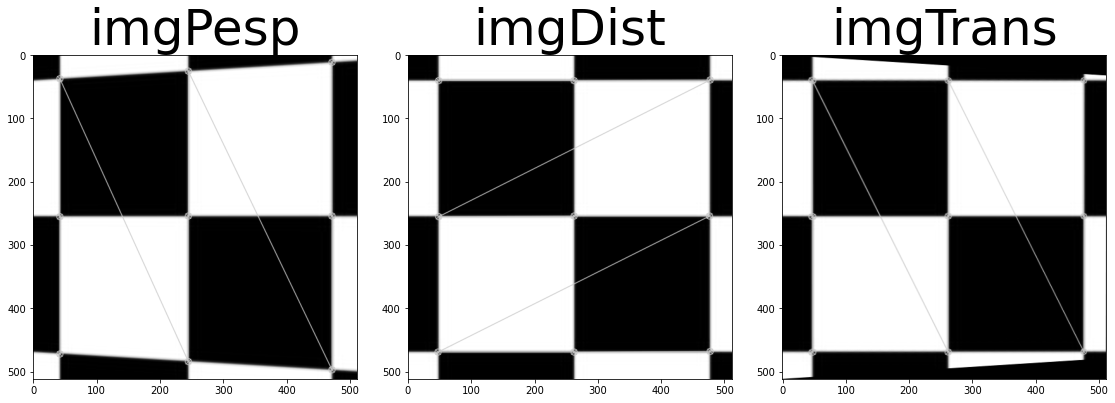

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (15, 5))
f.tight_layout()
ax1.imshow(imgPersp, cmap= 'gray')
ax1.set_title('imgPesp', fontsize=50)
ax2.imshow(imgDest, cmap= 'gray')
ax2.set_title('imgDist', fontsize=50)
ax3.imshow(imgTrans, cmap= 'gray')
ax3.set_title('imgTrans', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
 imgPersp.shape